In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Dataset loading and exploratory data analysis
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Identify missing values
heart_df.isna().sum()

# Handle missing values
df = heart_df.dropna();
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

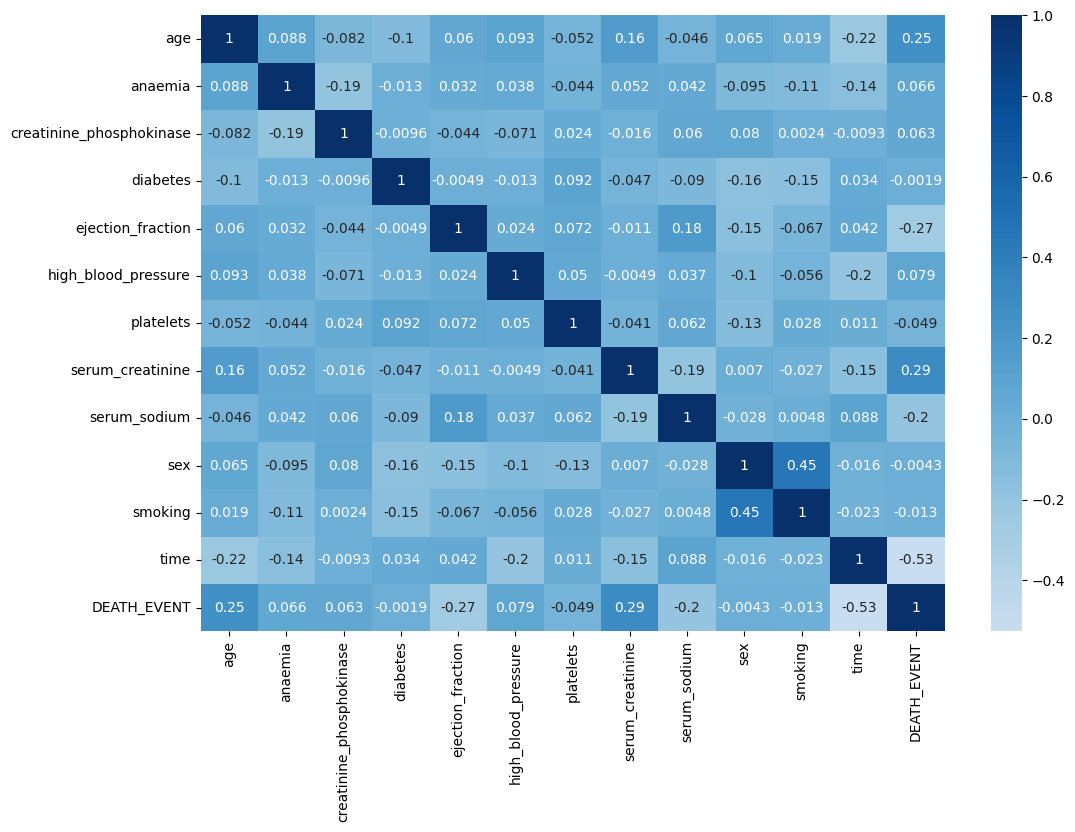

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gaining insights from the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)

plt.show()

In [5]:
## Defining feature vector and target variable

# Drop the target variable
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [6]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, 

((224, 12), (75, 12))

In [7]:
# Eliminating erelavant features from the dataset used in the model
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.6:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)


# Remove the correlated features from the dataset
X_train.drop(labels= correlated_features, axis = 1, inplace= True)
X_test.drop(labels= correlated_features, axis = 1, inplace= True)

set()


In [8]:
# Build the decision tree classifier- gini
clf_gini= DecisionTreeClassifier(criterion='gini',
                                max_depth= 2,
                                random_state= 0)

# Train the classifier
clf_gini.fit(X_train, y_train)

# Predicting results for the test set
y_pred= clf_gini.predict(X_test)

# Evaluate the model
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Compute the precision of the model
precision = metrics.precision_score(y_test, y_pred)
print('Precision: ', precision)

# Compute the recall of the model
recall = metrics.recall_score(y_test, y_pred)
print('Recall: ', recall)

# Compute the F1 score of the model
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: ', f1)

clf_gini.predict([[69,0,582,0,20,0,266000,1.2,134,1,1,73]])

Accuracy:  0.8533333333333334
Precision:  0.8
Recall:  0.6
F1 score:  0.6857142857142857


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [9]:
# Folds
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# precision, recall and F1
from sklearn.preprocessing import LabelBinarizer

# Create an instance of KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=0)

lb = LabelBinarizer()
y = np.array([number[0] for number in lb.fit_transform(y)])

# Build the decision tree classifier- gini
clf_gini= DecisionTreeClassifier(criterion='gini',
                                max_depth= 2,
                                random_state= 0)


scores_1 = cross_val_score(clf_gini, X, y, cv=kf)
print("Mean Accuracy:", scores_1.mean())

scores_1 = cross_val_score(clf_gini, X, y, cv=kf, scoring='precision')
print("Mean precision:", scores_1.mean())

scores_1 = cross_val_score(clf_gini, X, y, cv=kf, scoring='recall')
print("Mean recall:", scores_1.mean())

scores_1 = cross_val_score(clf_gini, X, y, cv=kf, scoring='f1')
print("Mean F1 Score:", scores_1.mean())

Mean Accuracy: 0.8363218390804599
Mean precision: 0.8283225108225108
Mean recall: 0.6426795426795427
Mean F1 Score: 0.7060173259533873


In [10]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [11]:
import pickle
pickle_out = open("clf_gini.pkl","wb")
pickle.dump(clf_gini, pickle_out)
pickle_out.close()

In [12]:
clf_gini.predict([[55,0,7861,0,38,0,263358.03,1.1,136,1,0,6]])

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)